In [1]:
import pm4py

In [2]:
log = pm4py.read_xes(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\1167521718_noisy.xes')
df = pm4py.convert_to_dataframe(log)
df

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0
...,...,...,...
6253,make phone call to sender and complete info,1970-04-26 18:46:50+00:00,999
6254,archive letter and infor mation,1970-04-26 18:46:51+00:00,999
6255,take letters and register to secretary,1970-04-26 18:46:52+00:00,999
6256,receive letter,1970-04-26 18:46:53+00:00,999


In [3]:
# print out the head of the event log
df.head()

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0


In [4]:
import numpy as np
unique_activities = np.unique(df['concept:name'])
len(unique_activities)

6

In [5]:
# extract the activities
activities = df['concept:name']
activities

0                            check  mail by  charlse
1                  archive  letter and  infor mation
2             take letters and register to secretary
3                                     receive letter
4              write letter with reason of rejection
                            ...                     
6253    make phone call to sender and complete  info
6254               archive  letter and  infor mation
6255          take letters and register to secretary
6256                                  receive letter
6257           write letter with reason of rejection
Name: concept:name, Length: 6258, dtype: object

In [6]:
# combine the rows by case number 
df1 =df.groupby('ID', as_index=False).agg(lambda x: x.tolist())
df1

,ID,concept:name,time:timestamp
0,0,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
1,1,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
2,2,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
3,3,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
4,4,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
...,...,...,...
995,995,"[check mail by charlse, make phone call to s...","[1970-04-26 18:46:48+00:00, 1970-04-26 18:46:5..."
996,996,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."
997,997,"[write letter with reason of rejection, check ...","[NaT, 1970-04-26 18:46:48+00:00, 1970-04-26 18..."
998,998,"[check mail by charlse, archive letter and ...","[1970-04-26 18:46:41+00:00, 1970-04-26 18:46:4..."


In [7]:
import re
# extract the traces
activities = df1['concept:name']
# convert all traces and case status into a string
activities = df1["concept:name"].astype(str)
activities

0      ['check  mail by  charlse', 'archive  letter a...
1      ['check  mail by  charlse', 'make phone call t...
2      ['check  mail by  charlse', 'archive  letter a...
3      ['check  mail by  charlse', 'make phone call t...
4      ['check  mail by  charlse', 'archive  letter a...
                             ...                        
995    ['check  mail by  charlse', 'make phone call t...
996    ['check  mail by  charlse', 'archive  letter a...
997    ['write letter with reason of rejection', 'che...
998    ['check  mail by  charlse', 'archive  letter a...
999    ['check  mail by  charlse', 'make phone call t...
Name: concept:name, Length: 1000, dtype: object

In [8]:
activities[0]

"['check  mail by  charlse', 'archive  letter and  infor mation', 'take letters and register to secretary', 'receive letter', 'write letter with reason of rejection']"

In [9]:
len(activities)

1000

In [10]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [11]:
len(corpus)

1000

In [12]:
corpus[0]

'check mail charls archiv letter infor mation take letter regist secretari receiv letter write letter reason reject'

In [13]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
words = nltk.word_tokenize(corpus[0])
words

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [14]:
vocab = []
for i in range(len(corpus)):
    all_words = nltk.word_tokenize(corpus[i])
    vocab.append(all_words)
    print(all_words)

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info']
['c

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', '

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'p

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', '

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 

['archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'ar

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'let

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'wr

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'check', 'mail', 'charls']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'l

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'wr

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter',

['check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'sec

['receiv', 'letter', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['receiv', 'letter', 'receiv', 'letter', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'check', 'mail', 'charls', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['che

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['take', 'letter', 'regist', 'secretari', 'write', 'letter', 'reason', 'reject', 'check', 'm

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sen

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 're

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'write', 'letter', 'reason', 'reject', 'receiv', 'letter', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['write', 'letter', 'reason', 'reject', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sen

['check', 'mail', 'charls', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', '

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter',

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject', 'archiv', 'letter', 'infor', 'mation']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['take', 'letter', 'regist', 'secretari', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv'

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari',

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regi

['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'archiv', 'letter', 'infor', 'mation', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['receiv', 'letter', 'check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 

['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'write', 'letter', 'reason', 'reject', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'make', 'phone', 'call', 'sender', 'complet', 'info', 'archiv', 'letter', 'infor', 'mation', 'take', 'letter', 'regist', 'secretari', 'receiv', 'letter', 'write', 'letter', 'reason', 'reject']
['check', 'mail', 'charls', 'archiv', 'letter', 'infor', 'mation', 'take', 'l

In [15]:
vocab[0]
    

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [16]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab, vector_size=100, window=3, min_count=0, sg=1)
nrEpochs= 10
model.train(vocab,total_examples=model.corpus_count,start_alpha=0.025, epochs=nrEpochs)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay


In [17]:
model

In [18]:
vocabulary = model.wv.key_to_index
vocabulary
   

{'letter': 0,
 'secretari': 1,
 'regist': 2,
 'take': 3,
 'mail': 4,
 'charls': 5,
 'check': 6,
 'mation': 7,
 'infor': 8,
 'archiv': 9,
 'reason': 10,
 'write': 11,
 'reject': 12,
 'receiv': 13,
 'complet': 14,
 'make': 15,
 'phone': 16,
 'call': 17,
 'sender': 18,
 'info': 19}

In [19]:
vocab[0]

['check',
 'mail',
 'charls',
 'archiv',
 'letter',
 'infor',
 'mation',
 'take',
 'letter',
 'regist',
 'secretari',
 'receiv',
 'letter',
 'write',
 'letter',
 'reason',
 'reject']

In [20]:
len(vocab[0])

17

In [21]:
import numpy as np
vectors = []
for i in range(len(vocab)):
        case_vector = []
        for j in range(len(vocab[i])):
            try:
                case_vector.append(model.wv[vocab[i][j]])
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [22]:
a=np.shape(vectors)
a

(1000, 100)

In [23]:
b=model.vector_size
b

100

In [24]:
len(vectors)

1000

In [25]:
vectors

[array([-0.05836336,  0.14893043,  0.07853244,  0.07560152,  0.01114672,
        -0.14162876,  0.16196263,  0.23031269, -0.16195142, -0.19964407,
         0.11599788, -0.1287387 ,  0.00925272, -0.0124213 ,  0.09790226,
        -0.04269429,  0.17974666, -0.00526047, -0.12974623, -0.3299657 ,
         0.07736053,  0.04673795,  0.25325224, -0.05556855, -0.05068211,
         0.05434014, -0.10201242,  0.03207616, -0.03654683,  0.02736239,
         0.05221763, -0.09461555,  0.06975738, -0.07876682, -0.07084066,
         0.14191471,  0.06941887,  0.00074037, -0.09261984, -0.08184687,
         0.07490905, -0.01887647, -0.04616109,  0.09148131,  0.06936944,
        -0.00099832, -0.12452332, -0.03431043,  0.03125085,  0.08671083,
        -0.01683123, -0.07344359, -0.07627677, -0.08073165, -0.03853514,
        -0.07542416,  0.08419907, -0.05042213,  0.04993105,  0.04236891,
        -0.07141805, -0.06279124,  0.22371   , -0.01641786, -0.08244342,
         0.16613138, -0.02033534,  0.19580439, -0.1

In [26]:
# read the csv file of the event log
import pandas as pd
df2 = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\1167521718.csv')
df2

,Unnamed: 0,ID,concept:name,Status
0,0,0,"['check mail by charlse', 'archive letter a...",Normal
1,1,1,"['check mail by charlse', 'make phone call t...",Normal
2,2,2,"['check mail by charlse', 'archive letter a...",Normal
3,3,3,"['check mail by charlse', 'make phone call t...",Normal
4,4,4,"['check mail by charlse', 'archive letter a...",Anomalous
...,...,...,...,...
995,995,995,"['check mail by charlse', 'make phone call t...",Normal
996,996,996,"['check mail by charlse', 'archive letter a...",Normal
997,997,997,"['write letter with reason of rejection', 'che...",Anomalous
998,998,998,"['check mail by charlse', 'archive letter a...",Normal


In [27]:
Y=df2['Status'].astype(str)
Y

0         Normal
1         Normal
2         Normal
3         Normal
4      Anomalous
         ...    
995       Normal
996       Normal
997    Anomalous
998       Normal
999       Normal
Name: Status, Length: 1000, dtype: object

In [28]:
# get binary values for the case status
y=pd.get_dummies(Y)
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(vectors)
X


array([[-1.05147882,  0.95432992,  0.80152139, ..., -1.06090252,
        -0.90731357, -0.99572283],
       [ 0.87946854, -0.77028731, -0.65018926, ...,  0.88575466,
         0.75906932,  0.83978562],
       [-1.05147882,  0.95432992,  0.80152139, ..., -1.06090252,
        -0.90731357, -0.99572283],
       ...,
       [ 1.48642863, -0.61555096,  0.13362688, ...,  1.11607764,
         0.67263788,  1.15934244],
       [-1.05147882,  0.95432992,  0.80152139, ..., -1.06090252,
        -0.90731357, -0.99572283],
       [ 0.87946854, -0.77028731, -0.65018926, ...,  0.88575466,
         0.75906932,  0.83978562]])

In [30]:
from multiprocessing import cpu_count
n_workers = cpu_count()

In [31]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
train_data = np.array(train_data)
positive_mask = np.array(train_labels) == 1

In [33]:
################ LocalOutlierFactor #########################

In [34]:
from sklearn.neighbors import LocalOutlierFactor
import time
from sklearn.metrics import  recall_score, accuracy_score, precision_score, f1_score

start_time = time.time()
lof = LocalOutlierFactor(contamination=0.01, novelty=True, n_jobs=n_workers)
lof.fit(train_data[positive_mask])
y_pred = lof.predict(test_data)
accurracy= accuracy_score(test_labels, y_pred)  
fscore= f1_score(test_labels, y_pred, average='micro' ) 
precision= precision_score(test_labels, y_pred, average='micro')                              
recall = recall_score(test_labels, y_pred, average='micro')
elapsed_time = time.time() - start_time


In [35]:
accurracy, precision, recall, fscore, elapsed_time

(0.555, 0.555, 0.555, 0.555, 0.2479407787322998)

In [36]:
from sklearn.metrics import  auc, roc_curve
from matplotlib import pyplot as plt
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

In [37]:
######################## OneClassSVM ##############################

In [38]:
from sklearn.svm import OneClassSVM
start_time = time.time()
ocsvm = OneClassSVM(nu=0.01,max_iter=1000000)
ocsvm.fit(train_data[positive_mask])
y_pred1 = ocsvm.predict(test_data)
accurracy_1= accuracy_score(test_labels, y_pred1)  
fscore_1= f1_score(test_labels, y_pred1, average='micro' ) 
precision_1= precision_score(test_labels, y_pred1, average='micro')                              
recall_1 = recall_score(test_labels, y_pred1, average='micro')
elapsed_time_1 = time.time() - start_time
                        

In [39]:
accurracy_1, precision_1, recall_1,fscore_1,  elapsed_time_1

(0.0, 0.0, 0.0, 0.0, 0.016000747680664062)

C:\Users\Nela\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


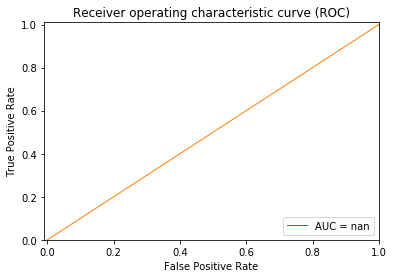

In [40]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred1, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
#################### BaggingClassifier ###################

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
n_estimators = 10
start_time = time.time()
svm = BaggingClassifier(base_estimator=SVC(kernel='poly', C=1000, gamma='scale', max_iter=1000000), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=n_workers)
svm.fit(train_data, train_labels)
y_pred_2 = svm.predict(test_data)
accurracy_2= accuracy_score(test_labels, y_pred_2)  
fscore_2= f1_score(test_labels, y_pred_2 ) 
precision_2= precision_score(test_labels, y_pred_2)                              
recall_2 = recall_score(test_labels, y_pred_2)
elapsed_time_2 = time.time() - start_time                        

In [43]:
accurracy_2,  precision_2, recall_2, fscore_2,elapsed_time_2

(0.91, 0.8604651162790697, 1.0, 0.9249999999999999, 1.7852325439453125)

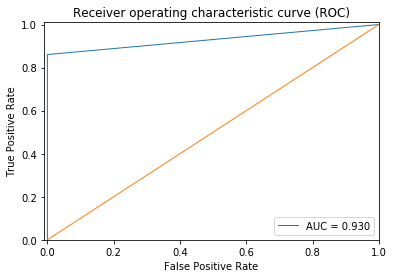

In [44]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred_2, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()